### Analysis of the affected genes

#### We want to extract the following information from the data:
- what are the targeted genes for different data points?
- how many targets are landmark genes?

- how many different timestamps did we measure?

### What data do we use?

compound (trt_cp):
targets can be found through the compoundinfo_beta.txt

shRNA (trt_sh, trt_sh.cgs):
affected genes can be found with help of GSE92742_Broad_LINCS_pert_info.txt

CRISPR (trt_xpr):
not explored yet

trt_oe:
no GT found yet

### Next steps
- create a dataframe with the following columns :
```sig_id pert_id pert_type pert_time cell_iname target target_is_landmark```
- for compound get that by joining 

In [ ]:
# Read Metadata
import pandas as pd

df_gene_info = pd.read_csv('../data/geneinfo_beta.txt', sep='\t')       # Metadata for genes (the features of the data matrices)
df_sig_info = pd.read_csv('../data/siginfo_beta.txt', sep='\t')       # Metadata for level 5 profiles
df_comp_info = pd.read_csv('../data/compoundinfo_beta.txt', sep='\t')   # Metadata for cell lines 

/tmp/ipykernel_179865/1830988630.py:5: DtypeWarning: Columns (0,3,4,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sig_info = pd.read_csv('siginfo_beta.txt', sep='\t')       # Metadata for level 5 profiles


### Find targets for oe, sh, xpr

In [3]:
# keep only pert_types that start with 'trt_oe', 'trt_sh', 'trt_xpr'
print("og sig info shape: ", df_sig_info.shape)
df_sig_info_filtered = df_sig_info[df_sig_info['pert_type'].str.contains('trt_oe|trt_sh|trt_xpr')]
print("filtered sig info shape: ", df_sig_info_filtered.shape)
df_sig_info_gene = pd.merge(df_sig_info_filtered, df_gene_info, left_on='cmap_name', right_on='gene_symbol', how='inner')
print("sig info gene shape: ", df_sig_info_gene.shape)
df_sig_info_gene = df_sig_info_gene[['sig_id', 'cmap_name', 'pert_id', 'pert_type', 'pert_mfc_id', 'cell_iname', 'pert_idose', 'pert_time', 'gene_symbol', 'feature_space']]
df_sig_info_gene = df_sig_info_gene.rename(columns={'gene_symbol': 'affected_gene'})
df_sig_info_gene

og sig info shape:  (1201944, 37)
filtered sig info shape:  (413467, 37)
sig info gene shape:  (310699, 44)


,sig_id,cmap_name,pert_id,pert_type,pert_mfc_id,cell_iname,pert_idose,pert_time,affected_gene,feature_space
0,PAL002_PC3_XH:PCMV-TAG2B-MARCKS:-666:48,MARCKS,PCMV-TAG2B-MARCKS,trt_oe,PCMV-TAG2B-MARCKS,PC3,NaN,48.0,MARCKS,best inferred
1,MDVL001_293T_72H:50943_WT:200,FOXP3,50943_WT,trt_oe,50943_WT,HEK293T,200 ng,72.0,FOXP3,best inferred
2,HSF010_HEK293T_48H:CMAP-HSF-SMAD4:200,SMAD4,CMAP-HSF-SMAD4,trt_oe,CMAP-HSF-SMAD4,HEK293T,200 ng,48.0,SMAD4,best inferred
3,HSF010_HEK293T_48H:CMAP-HSF-TRMT1:200,TRMT1,CMAP-HSF-TRMT1,trt_oe,CMAP-HSF-TRMT1,HEK293T,200 ng,48.0,TRMT1,best inferred
4,HSF011_HEK293T_48H:CMAP-HSF-IKZF2:200,IKZF2,CMAP-HSF-IKZF2,trt_oe,CMAP-HSF-IKZF2,HEK293T,200 ng,48.0,IKZF2,best inferred
...,...,...,...,...,...,...,...,...,...,...
310694,ERGK016_VCAP_120H:TRCN0000118880:-666,GOLGA5,TRCN0000118880,trt_sh,TRCN0000118880,VCAP,NaN,120.0,GOLGA5,best inferred
310695,ERGK016_VCAP_120H:TRCN0000001586:-666,OXSR1,TRCN0000001586,trt_sh,TRCN0000001586,VCAP,NaN,120.0,OXSR1,landmark
310696,ERGK005_VCAP_120H:TRCN0000006197:-666,PHKB,TRCN0000006197,trt_sh,TRCN0000006197,VCAP,NaN,120.0,PHKB,landmark
310697,ERGK005_VCAP_120H:TRCN0000196810:-666,PGK1,TRCN0000196810,trt_sh,TRCN0000196810,VCAP,NaN,120.0,PGK1,best inferred


### Find targets for cp

In [4]:
df_sig_info_filtered = df_sig_info[df_sig_info['pert_type'].str.contains('trt_cp')]
df_sig_info_filtered

,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_itime,pert_time,pert_time_unit,cell_mfc_name,pert_mfc_id,...,cell_iname,det_wells,det_plates,distil_ids,build_name,project_code,cmap_name,is_exemplar_sig,is_ncs_sig,is_null_sig
0,b17,NaN,100.0,ug/ml,100 ug/ml,336 h,336.0,h,N8,BRD-U44432129,...,NAMEC8,H05|H06|H07|H08,MET001_N8_XH_X1_B17,MET001_N8_XH_X1_B17:H05|MET001_N8_XH_X1_B17:H0...,NaN,MET,BRD-U44432129,0,0.0,0.0
1,b15,10.0,10.0,uM,10 uM,3 h,3.0,h,A549,BRD-K81418486,...,A549,L04|L08|L12,ABY001_A549_XH_X1_B15,ABY001_A549_XH_X1_B15:L04|ABY001_A549_XH_X1_B1...,NaN,ABY,vorinostat,0,1.0,0.0
2,b15,2.5,2.5,uM,2.5 uM,24 h,24.0,h,HT29,BRD-K70511574,...,HT29,E18|E22,ABY001_HT29_XH_X1_B15,ABY001_HT29_XH_X1_B15:E18|ABY001_HT29_XH_X1_B1...,NaN,ABY,HMN-214,0,1.0,0.0
3,b18,10.0,10.0,uM,10 uM,3 h,3.0,h,HME1,BRD-K81418486,...,HME1,F19,LTC002_HME1_3H_X1_B18,LTC002_HME1_3H_X1_B18:F19,NaN,LTC,vorinostat,0,0.0,0.0
4,b15,10.0,10.0,uM,10 uM,3 h,3.0,h,H1975,BRD-A61304759,...,H1975,P01|P05|P09,ABY001_H1975_XH_X1_B15,ABY001_H1975_XH_X1_B15:P01|ABY001_H1975_XH_X1_...,NaN,ABY,tanespimycin,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201939,b18,10.0,10.0,uM,10 uM,24 h,24.0,h,HCC515,BRD-K48853221,...,HCC515,K01,DOSVAL001_HCC515_24H_X1_B18|DOSVAL001_HCC515_2...,DOSVAL001_HCC515_24H_X1_B18:K01|DOSVAL001_HCC5...,NaN,DOSVAL,BRD-K48853221,1,1.0,0.0
1201940,b18,10.0,10.0,uM,10 uM,24 h,24.0,h,HCC515,BRD-K90382497,...,HCC515,O03,DOSVAL001_HCC515_24H_X1_B18|DOSVAL001_HCC515_2...,DOSVAL001_HCC515_24H_X1_B18:O03|DOSVAL001_HCC5...,NaN,DOSVAL,GW-843682X,0,1.0,0.0
1201941,b19,20.0,20.0,uM,20 uM,24 h,24.0,h,HCC515,BRD-K45785972,...,HCC515,M22,DOSVAL002_HCC515_24H_X1.L2_B19|DOSVAL002_HCC51...,DOSVAL002_HCC515_24H_X1.L2_B19:M22|DOSVAL002_H...,NaN,DOSVAL,BRD-K45785972,0,1.0,0.0
1201942,b19,4.0,5.0,uM,4 uM,24 h,24.0,h,A375,BRD-K28513938,...,A375,E09,DOSVAL004_A375_24H_X1.A2_B19|DOSVAL004_A375_24...,DOSVAL004_A375_24H_X1.A2_B19:E09|DOSVAL004_A37...,NaN,DOSVAL,BRD-K28513938,0,1.0,0.0


In [ ]:
print('comp_info size:', df_comp_info.shape)
# some compounds have multiple targets/modes of action
# since we are not sure how to handle that we remove all rows where the pert_id is not unique. 
# for that we count the number of occurences of each pert_id and remove all that have a count > 1
df_comp_info['count'] = df_comp_info.groupby('pert_id')['pert_id'].transform('count')
df_comp_info = df_comp_info[df_comp_info['count'] == 1]
df_comp_info = df_comp_info.drop(columns=['count'])
print('comp_info size after removing duplicates:', df_comp_info.shape)

comp_info size: (39321, 7)
comp_info size after removing duplicates: (33039, 7)


In [ ]:
# join df_sig_info and df_comp_info to create a new dataframe with the columns 'sig_id', 'pert_id', 'pert_type', 'pert_iname', 'cell_id', 'pert_idose', 'pert_time', target
print(df_sig_info.shape)
df_sig_info_cp = df_sig_info[df_sig_info['pert_type'].str.contains('trt_cp')]
df_cp_target_info = pd.merge(df_sig_info_cp, df_comp_info, on='pert_id', how='inner')
print(df_cp_target_info.shape)
df_cp_target_info = df_cp_target_info[['sig_id','cmap_name_x', 'pert_id', 'pert_type', 'pert_mfc_id', 'cell_iname', 'pert_idose', 'pert_time', 'target']]
# rename cmap_name_x to cmap_name
df_cp_target_info.rename(columns={'cmap_name_x': 'cmap_name'}, inplace=True)
# rename target to affected_gene
df_cp_target_info.rename(columns={'target': 'affected_gene'}, inplace=True)

# join df_cp_target_info with df_gene_info to create a new dataframe with the columns 'sig_id', 'pert_id', 'pert_iname', 'cell_id', 'pert_idose', 'pert_time', target, feature_space
# join over the column target from df_cp_target_info and the column gene_symbol from df_gene_info
df_cp_target_info_gene = pd.merge(df_cp_target_info, df_gene_info, left_on='affected_gene', right_on='gene_symbol', how='inner')
df_cp_target_info_gene = df_cp_target_info_gene[['sig_id', 'cmap_name', 'pert_id', 'pert_type', 'pert_mfc_id', 'cell_iname', 'pert_idose', 'pert_time', 'affected_gene', 'feature_space']]
df_cp_target_info_gene

(1201944, 37)
(522406, 43)


,sig_id,cmap_name,pert_id,pert_type,pert_mfc_id,cell_iname,pert_idose,pert_time,affected_gene,feature_space
0,ABY001_H1975_XH:BRD-A61304759:10:3,tanespimycin,BRD-A61304759,trt_cp,BRD-A61304759,H1975,10 uM,3.0,HSP90AA1,best inferred
1,ABY001_SKBR3_XH:BRD-A90490067:0.625:3,fulvestrant,BRD-A90490067,trt_cp,BRD-A90490067,SKBR3,0.66 uM,3.0,ESR1,best inferred
2,LTC002_HME1_24H:BRD-A45498368:0.0070711,WYE-125132,BRD-A45498368,trt_cp,BRD-A45498368,HME1,0.006 uM,24.0,MTOR,best inferred
3,LTC003_HME1_24H:BRD-K52911425:14.1421,GDC-0941,BRD-K52911425,trt_cp,BRD-K52911425,HME1,15 uM,24.0,PIK3CG,best inferred
4,LUNG001_A549_24H:BRD-K88551539:10,CAY-10585,BRD-K88551539,trt_cp,BRD-K88551539,A549,10 uM,24.0,HIF1A,landmark
...,...,...,...,...,...,...,...,...,...,...
186519,DOSVAL006_A549_24H:BRD-A61304759:5,tanespimycin,BRD-A61304759,trt_cp,BRD-A61304759,A549,4 uM,24.0,HSP90AA1,best inferred
186520,DOSVAL001_HCC515_24H:BRD-K75295174:10,alisertib,BRD-K75295174,trt_cp,BRD-K75295174,HCC515,10 uM,24.0,AURKA,landmark
186521,DOSVAL004_HT29_24H:BRD-K75295174:10,alisertib,BRD-K75295174,trt_cp,BRD-K75295174,HT29,10 uM,24.0,AURKA,landmark
186522,DOSVAL002_A549_24H:BRD-A61304759:10,tanespimycin,BRD-A61304759,trt_cp,BRD-A61304759,A549,10 uM,24.0,HSP90AA1,best inferred


### Combine Dataframes

In [ ]:
# combine the df_cp_target_info_gene and df_sig_info_gene
print(df_cp_target_info_gene.shape)
print(df_sig_info_gene.shape)
df_sig_info_target = pd.concat([df_cp_target_info_gene, df_sig_info_gene])
print(df_sig_info_target.shape)
print(df_sig_info.shape)
df_sig_info_target

(186524, 10)
(310699, 10)
(497223, 10)
(1201944, 37)


,sig_id,cmap_name,pert_id,pert_type,pert_mfc_id,cell_iname,pert_idose,pert_time,affected_gene,feature_space
0,ABY001_H1975_XH:BRD-A61304759:10:3,tanespimycin,BRD-A61304759,trt_cp,BRD-A61304759,H1975,10 uM,3.0,HSP90AA1,best inferred
1,ABY001_SKBR3_XH:BRD-A90490067:0.625:3,fulvestrant,BRD-A90490067,trt_cp,BRD-A90490067,SKBR3,0.66 uM,3.0,ESR1,best inferred
2,LTC002_HME1_24H:BRD-A45498368:0.0070711,WYE-125132,BRD-A45498368,trt_cp,BRD-A45498368,HME1,0.006 uM,24.0,MTOR,best inferred
3,LTC003_HME1_24H:BRD-K52911425:14.1421,GDC-0941,BRD-K52911425,trt_cp,BRD-K52911425,HME1,15 uM,24.0,PIK3CG,best inferred
4,LUNG001_A549_24H:BRD-K88551539:10,CAY-10585,BRD-K88551539,trt_cp,BRD-K88551539,A549,10 uM,24.0,HIF1A,landmark
...,...,...,...,...,...,...,...,...,...,...
310694,ERGK016_VCAP_120H:TRCN0000118880:-666,GOLGA5,TRCN0000118880,trt_sh,TRCN0000118880,VCAP,NaN,120.0,GOLGA5,best inferred
310695,ERGK016_VCAP_120H:TRCN0000001586:-666,OXSR1,TRCN0000001586,trt_sh,TRCN0000001586,VCAP,NaN,120.0,OXSR1,landmark
310696,ERGK005_VCAP_120H:TRCN0000006197:-666,PHKB,TRCN0000006197,trt_sh,TRCN0000006197,VCAP,NaN,120.0,PHKB,landmark
310697,ERGK005_VCAP_120H:TRCN0000196810:-666,PGK1,TRCN0000196810,trt_sh,TRCN0000196810,VCAP,NaN,120.0,PGK1,best inferred


In [ ]:
df_sig_info_target.describe()

,pert_time
count,497223.000000
mean,70.229393
std,40.236373
min,-666.000000
25%,24.000000
50%,96.000000
75%,96.000000
max,408.000000


In [ ]:
# filter for feature_space == 'landmark' and pert_time == 96. find cell_iname with most entries
df_sig_info_target[(df_sig_info_target['feature_space'] == 'landmark') & (df_sig_info_target['pert_time'] == 96)]['cell_iname'].value_counts()

#select rows with cell_iname == A549 and feature_space == 'landmark'
df_sig_info_target_A549 = df_sig_info_target[(df_sig_info_target['cell_iname'] == 'A549') & (df_sig_info_target['feature_space'] == 'landmark')]
df_sig_info_target_A549

,sig_id,cmap_name,pert_id,pert_type,pert_mfc_id,cell_iname,pert_idose,pert_time,affected_gene,feature_space
4,LUNG001_A549_24H:BRD-K88551539:10,CAY-10585,BRD-K88551539,trt_cp,BRD-K88551539,A549,10 uM,24.0,HIF1A,landmark
16,LUNG001_A549_24H:BRD-K75295174:10,alisertib,BRD-K75295174,trt_cp,BRD-K75295174,A549,10 uM,24.0,AURKA,landmark
43,HOG002_A549_6H:BRD-K92093830-003-18-3:1.11,doxorubicin,BRD-K92093830,trt_cp,BRD-K92093830,A549,1.11 uM,6.0,TOP2A,landmark
142,HOG002_A549_6H:BRD-K11163873-001-02-8:0.013,phenanthridone,BRD-K11163873,trt_cp,BRD-K11163873,A549,0.01 uM,6.0,PARP1,landmark
247,HOG001_A549_24H:BRD-A85860691-001-02-2:0.3704,chaetocin,BRD-A85860691,trt_cp,BRD-A85860691,A549,0.37 uM,24.0,SUV39H1,landmark
...,...,...,...,...,...,...,...,...,...,...
305360,XPR042_A549.311_96H:L16,ABHD6,BRDN0001500836,trt_xpr,BRDN0001500836,A549,NaN,96.0,ABHD6,landmark
305362,XPR043_A549.311_96H:M04,AXIN1,BRDN0001065184,trt_xpr,BRDN0001065184,A549,NaN,96.0,AXIN1,landmark
305378,XPR015_A549.311_96H:H09,DAG1,BRDN0001497687,trt_xpr,BRDN0001497687,A549,NaN,96.0,DAG1,landmark
305379,XPR016_A549.311_96H:M03,DUSP4,BRDN0001066362,trt_xpr,BRDN0001066362,A549,NaN,96.0,DUSP4,landmark


In [ ]:
df_sig_info[['sig_id', 'cmap_name', 'pert_id', 'pert_type', 'pert_mfc_id', 'cell_iname', 'pert_idose', 'pert_time']].describe()

,pert_time
count,1.201944e+06
mean,4.862595e+01
std,4.089834e+01
min,-6.660000e+02
25%,2.400000e+01
50%,2.400000e+01
75%,9.600000e+01
max,4.080000e+02


sum of experiments with known target:  497223


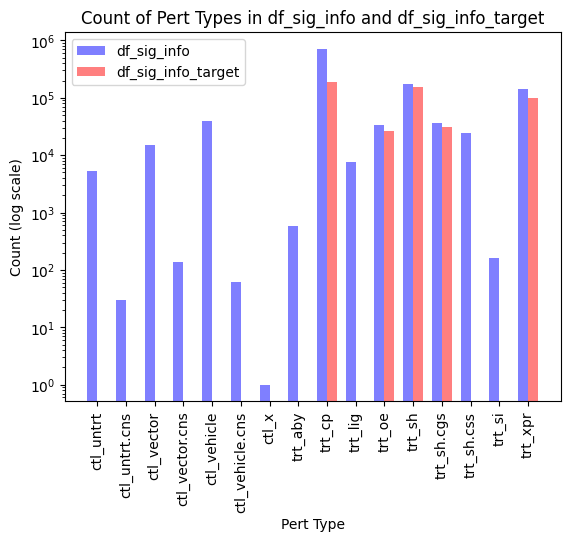

In [ ]:
import numpy as np

# create a histogram that has to bars for every pert_type. One bar for the count of the pert_type in df_sig_info and one bar for the count of the pert_type in df_sig_info_target
import matplotlib.pyplot as plt

# Get the value counts for each dataframe
df_sig_info_counts = df_sig_info['pert_type'].value_counts()
df_sig_info_target_counts = df_sig_info_target['pert_type'].value_counts()

# Align the indices of the two series
df_sig_info_counts = df_sig_info_counts.reindex(df_sig_info_counts.index.union(df_sig_info_target_counts.index), fill_value=0)
df_sig_info_target_counts = df_sig_info_target_counts.reindex(df_sig_info_counts.index, fill_value=0)

# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(len(df_sig_info_counts))

# Plot the bars
fig, ax = plt.subplots()
bar1 = ax.bar(index, df_sig_info_counts, bar_width, label='df_sig_info', color='blue', alpha=0.5)
bar2 = ax.bar(index + bar_width, df_sig_info_target_counts, bar_width, label='df_sig_info_target', color='red', alpha=0.5)

# Add labels, title, and legend
ax.set_xlabel('Pert Type')
ax.set_ylabel('Count (log scale)')
ax.set_title('Count of Pert Types in df_sig_info and df_sig_info_target')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_sig_info_counts.index, rotation=90)
ax.set_yscale('log')
ax.legend()

print("sum of experiments with known target: ", df_sig_info_target.shape[0])

# Show the plot
plt.show()

sum of experiments with landmark target:  135798


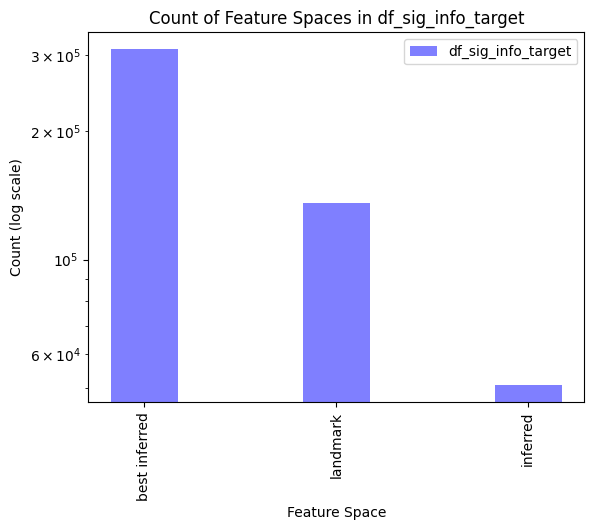

In [ ]:
# create a histogram that has three bars for every pert_type. One bar per feature_space in df_sig_info_target
# Get the value counts for each dataframe
df_sig_info_target_counts = df_sig_info_target['feature_space'].value_counts()

# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(len(df_sig_info_target_counts))

# Plot the bars
fig, ax = plt.subplots()
bar1 = ax.bar(index, df_sig_info_target_counts, bar_width, label='df_sig_info_target', color='blue', alpha=0.5)

# Add labels, title, and legend
ax.set_xlabel('Feature Space')
ax.set_ylabel('Count (log scale)')
ax.set_title('Count of Feature Spaces in df_sig_info_target')
ax.set_xticks(index)
ax.set_xticklabels(df_sig_info_target_counts.index, rotation=90)
ax.set_yscale('log')
ax.legend()

print("sum of experiments with landmark target: ", df_sig_info_target[df_sig_info_target['feature_space'] == 'landmark'].shape[0])

# Show the plot
plt.show()


In [ ]:
# print the number of experiments that have only one timestamp at 96 and that affect a cell with feature space 'landmark'
# get all entries in df_sig_info_target with pert_time == 96
df_sig_info_target_96 = df_sig_info_target[df_sig_info_target['pert_time'] == 96]
print("sig info target shape: ", df_sig_info_target_96.shape)
# get all entries in df_sig_info_target_96 where the cell_iname has feature space 'landmark'
df_sig_info_target_96_landmark = df_sig_info_target_96[df_sig_info_target_96['feature_space'] == 'landmark']
print("sig info target landmark shape: ", df_sig_info_target_96_landmark.shape)

sig info target shape:  (266657, 10)
sig info target landmark shape:  (79688, 10)


In [ ]:
# check if there are columns where pert_id and cell_iname are the same but pert_idose is different
# fot that we group by pert_id and cell_iname and count the number of unique pert_idose values
# df_sig_info_target.groupby(['pert_id', 'cell_iname']).agg({'pert_idose': pd.Series.nunique}).sort_values(by='pert_idose', ascending=False)
# -- > apperently there are columns where pert_id and cell_iname are the same but pert_idose is different


In [ ]:
# we now want to analyze how many timestamps were mesured per experiment.
# we define an experiment as a unique combination of pert_id, pert_idose, and cell_iname
# if one of these values is nan we just add a string 'nan' to the experiment_id
# we create a new dataframe that has a column 'experiment_id' that is a unique identifier for the experiment
# and a column timestamps contains a list of all timestamps that were measured in the experiment
# a column n_timestamps that contains the number of timestamps that were measured in the experiment
# the name of the new dataframe will be df_experiments
print(df_sig_info_target.shape)
df_sig_info_target['experiment_id'] = df_sig_info_target['pert_id'] + '_' + df_sig_info_target['pert_idose'].fillna('unknown') + '_' + df_sig_info_target['cell_iname'].fillna('nan')
print(df_sig_info_target.shape)
df_experiments = df_sig_info_target.groupby('experiment_id').agg({'pert_time': lambda x: sorted(list(x))}).reset_index()
df_experiments['n_timestamps'] = df_experiments['pert_time'].apply(len)
df_experiments['cell_iname'] = df_experiments['experiment_id'].apply(lambda x: x.split('_')[-1])
df_experiments

(497223, 10)
(497223, 11)


,experiment_id,pert_time,n_timestamps,cell_iname
0,10102_R333W_200 ng_HEK293T,"[72.0, 96.0]",2,HEK293T
1,10102_WT_200 ng_HEK293T,"[72.0, 96.0]",2,HEK293T
2,1026_D149G_200 ng_HEK293T,"[72.0, 96.0]",2,HEK293T
3,1026_R67L_200 ng_HEK293T,"[72.0, 96.0]",2,HEK293T
4,1026_R84Q_200 ng_HEK293T,"[72.0, 96.0]",2,HEK293T
...,...,...,...,...
394923,ZC5_unknown_HEK293T,"[20.0, 30.0]",2,HEK293T
394924,ZC6_unknown_HEK293T,"[20.0, 30.0]",2,HEK293T
394925,ZC7_unknown_HEK293T,"[20.0, 30.0]",2,HEK293T
394926,ZC8_unknown_HEK293T,"[20.0, 30.0]",2,HEK293T


In [ ]:
# print 5 most comon cell_inames
df_experiments['cell_iname'].value_counts().head()

cell_iname
PC3     33971
A375    33569
A549    33179
HT29    31849
MCF7    30914
Name: count, dtype: int64

In [ ]:
# sum the entire column n_timestamps as a test. the sum should be equal to the number of rows in df_sig_info_target
print(df_experiments['n_timestamps'].sum())
# count how many experiments have more than one timestamp
print(df_experiments[df_experiments['n_timestamps'] > 1].shape[0])


497223
62781


In [ ]:
# count how often timestamps were measured
df_timestamp_counts = df_experiments['pert_time'].explode().value_counts().sort_index()
df_timestamp_counts

pert_time
-666.0        16
 0.0          15
 0.5           3
 1.0           3
 2.0          52
 3.0        3975
 4.0         960
 6.0       28425
 12.0        117
 20.0         73
 24.0     151794
 30.0         73
 48.0       3052
 72.0       2228
 96.0     266657
 120.0     23378
 144.0     15816
 168.0       484
 192.0        69
 240.0         3
 288.0         3
 336.0         3
 408.0        24
Name: count, dtype: int64

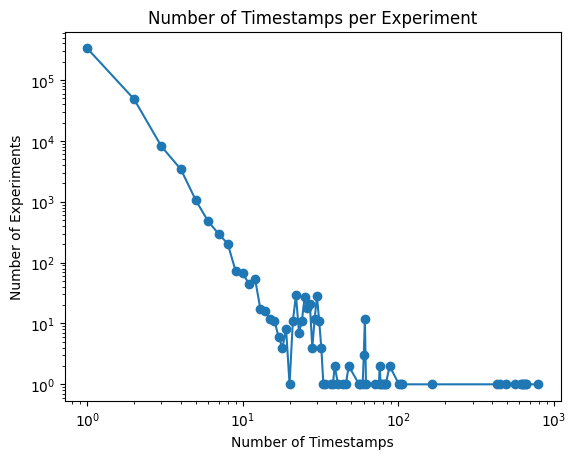

In [ ]:
# create a line plot that shows how many timestamps were measured in each experiment
# x axis should be n_timestamps and y axis should be the number of experiments that have n_timestamps timestamps
# the plot should be in log scale

# Get the value counts for the number of timestamps
df_n_timestamps_counts = df_experiments['n_timestamps'].value_counts().sort_index()

# create the plot
fig, ax = plt.subplots()
ax.plot(df_n_timestamps_counts.index, df_n_timestamps_counts, marker='o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Number of Timestamps')
ax.set_ylabel('Number of Experiments')
ax.set_title('Number of Timestamps per Experiment')
plt.show()

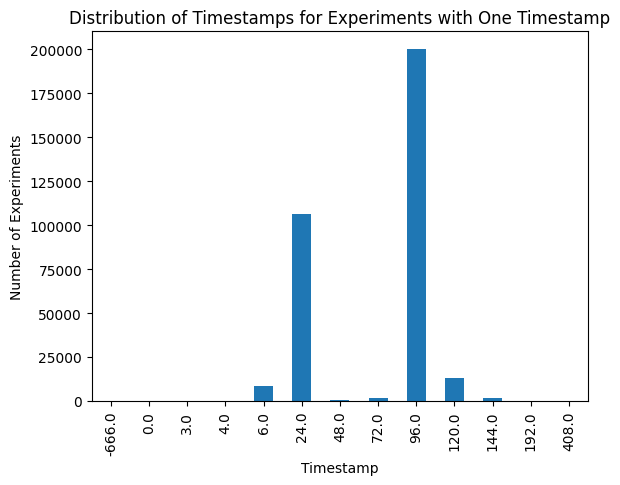

In [ ]:
# get the experiments that only have one timestamp.
# for those plot the distribution of the timestamps
# add labels, title, and legend
df_experiments_one_timestamp = df_experiments[df_experiments['n_timestamps'] == 1]
df_experiments_one_timestamp['pert_time'].explode().value_counts().sort_index().plot(kind='bar')
plt.xlabel('Timestamp')
plt.ylabel('Number of Experiments')
plt.title('Distribution of Timestamps for Experiments with One Timestamp')
plt.show()

In [ ]:
df_sig_info_target

,sig_id,cmap_name,pert_id,pert_type,pert_mfc_id,cell_iname,pert_idose,pert_time,affected_gene,feature_space,experiment_id
0,ABY001_H1975_XH:BRD-A61304759:10:3,tanespimycin,BRD-A61304759,trt_cp,BRD-A61304759,H1975,10 uM,3.0,HSP90AA1,best inferred,BRD-A61304759_10 uM_H1975
1,ABY001_SKBR3_XH:BRD-A90490067:0.625:3,fulvestrant,BRD-A90490067,trt_cp,BRD-A90490067,SKBR3,0.66 uM,3.0,ESR1,best inferred,BRD-A90490067_0.66 uM_SKBR3
2,LTC002_HME1_24H:BRD-A45498368:0.0070711,WYE-125132,BRD-A45498368,trt_cp,BRD-A45498368,HME1,0.006 uM,24.0,MTOR,best inferred,BRD-A45498368_0.006 uM_HME1
3,LTC003_HME1_24H:BRD-K52911425:14.1421,GDC-0941,BRD-K52911425,trt_cp,BRD-K52911425,HME1,15 uM,24.0,PIK3CG,best inferred,BRD-K52911425_15 uM_HME1
4,LUNG001_A549_24H:BRD-K88551539:10,CAY-10585,BRD-K88551539,trt_cp,BRD-K88551539,A549,10 uM,24.0,HIF1A,landmark,BRD-K88551539_10 uM_A549
...,...,...,...,...,...,...,...,...,...,...,...
310694,ERGK016_VCAP_120H:TRCN0000118880:-666,GOLGA5,TRCN0000118880,trt_sh,TRCN0000118880,VCAP,NaN,120.0,GOLGA5,best inferred,TRCN0000118880_unknown_VCAP
310695,ERGK016_VCAP_120H:TRCN0000001586:-666,OXSR1,TRCN0000001586,trt_sh,TRCN0000001586,VCAP,NaN,120.0,OXSR1,landmark,TRCN0000001586_unknown_VCAP
310696,ERGK005_VCAP_120H:TRCN0000006197:-666,PHKB,TRCN0000006197,trt_sh,TRCN0000006197,VCAP,NaN,120.0,PHKB,landmark,TRCN0000006197_unknown_VCAP
310697,ERGK005_VCAP_120H:TRCN0000196810:-666,PGK1,TRCN0000196810,trt_sh,TRCN0000196810,VCAP,NaN,120.0,PGK1,best inferred,TRCN0000196810_unknown_VCAP


# Questions
- how should we handle the time series? Since the data is not very uniform maybe do single shot not time series?
- how do we handle drugs with multiple targets? Multi source prediction? 

My thoughts: keep it as simple as possible. So filter out drugs with mutiple targets.


In [ ]:
# filter for experiments with pert_type trt_oe
df_sig_info_target_oe = df_sig_info_target[df_sig_info_target['pert_type'] == 'trt_oe']
# find most common affected genes
df_sig_info_target_oe['affected_gene'].value_counts().head()
# filter out affected_gene TP53
df_sig_info_target_oe = df_sig_info_target_oe[df_sig_info_target_oe['affected_gene'] == 'TP53']

# get all pert_ids that have TP53 as affected gene
df_sig_info_target_oe['pert_id'].unique()

# g


array(['CCSBBROAD304_07088', 'CMAP-HSF-TP53', 'SLIM2', 'BRDN0000552500',
       'BRDN0000465074', 'BRDN0000552709', 'BRDN0000561664',
       'BRDN0000552897', 'BRDN0000552750', 'BRDN0000552708',
       'BRDN0000552678', 'BRDN0000552879', 'BRDN0000552696',
       'TRCN0000471908', 'BRDN0000399961', 'BRDN0000552732',
       'BRDN0000552776', 'BRDN0000552512', 'BRDN0000552669',
       'BRDN0000552706', 'BRDN0000552661', 'BRDN0000552666',
       'BRDN0000552645', 'BRDN0000552465', 'BRDN0000552836',
       'BRDN0000552635', 'BRDN0000560842', 'BRDN0000552774',
       'BRDN0000464908', 'BRDN0000552673', 'BRDN0000552846',
       'BRDN0000552813', 'BRDN0000552716', 'BRDN0000552704',
       'BRDN0000552857', 'BRDN0000560837', 'BRDN0000552941',
       'BRDN0000552628', 'BRDN0000552647', 'BRDN0000552953',
       'BRDN0000552681', 'BRDN0000552637', 'BRDN0000552867',
       'BRDN0000552845', 'BRDN0000552900', 'BRDN0000552797',
       'BRDN0000552749', 'BRDN0000552523', 'BRDN0000552654',
       'BRDN